# Churn Reduction

In [55]:
#   LOADING THE REQUIRED LIBRARIES

import os
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [56]:
#   CHANGE AND GET THE WORKING DIRECTORY

os.chdir("D:/project1/churnreduction")
os.getcwd()

'D:\\project1\\churnreduction'

In [57]:
# LOADING THE DATA TRAIN.CSV AND TEST.CSV

train_dataset = pd.read_csv("Train_data.csv")
test_dataset = pd.read_csv("Test_data.csv")


In [58]:
# GETTING TYPE OF THE DATASETS

type(train_dataset)
type(test_dataset)

pandas.core.frame.DataFrame

In [59]:
# OVERVIEW OF THE TRAIN AND TEST DATASETS


train_dataset.head(15)
test_dataset.head(10)
train_dataset.shape

(3333, 21)

In [60]:
# MERGING TRAIN AND TEST DATASETS INTO " mydata " NAMES DATASET


train_dataset["myindex"]=1
test_dataset["myindex"]=2
mydata=train_dataset.append(test_dataset)
mydata=mydata.reset_index(drop=True)

In [61]:
# OVERVIEW OF THE "mydata" DATASET


mydata.head()
mydata.tail()
mydata.shape


(5000, 22)

In [62]:
# DATATYPES OF THE ALL THE VARIABLES


mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

# MISSING VALUE ANALYSIS

In [63]:
# GETTING MISSING VALUES OF THE DATASET INTO " missing_val"


missing_val = pd.DataFrame(mydata.isnull().sum())
missing_val

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


# DATA MANIPULATION

In [64]:
# GETTING COLUMN NAMES OF ALL THE VARIABLE OF THE DATASET


mydata.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn', 'myindex'],
      dtype='object')

In [65]:
#GETTING UNIQUE VALUES OF " area code " VARIABLE

mydata['area code'].unique()

#CONVERTING "area code" VARIABLE'S DATA TYPE TO OBJECT FROM INT64

mydata['area code']=mydata['area code'].astype(object)
mydata.info()
mydata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null object
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes          

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,myindex
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1


In [66]:
# GETTING UNIQUE VALUES OF " state " VARIABLE

mydata['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [67]:
# ASSIGNING LEVELS TO ALL THE OBJECT TYPE VARIABLES


lis = []
for i in range(0, mydata.shape[1]):
    #print(i)
    if(mydata.iloc[:,i].dtypes == 'object'):
           
        mydata.iloc[:,i] = pd.Categorical(mydata.iloc[:,i])
       
        mydata.iloc[:,i] = mydata.iloc[:,i].cat.codes
   
        mydata.iloc[:,i] = mydata.iloc[:,i].astype('object')
        
        lis.append(mydata.columns[i])

In [68]:
mydata.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,myindex
0,16,128,1,2845,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,35,107,1,2301,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,31,137,1,1616,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1
3,35,84,0,2510,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1
4,36,75,1,155,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1


In [69]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null object
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes          

# OUTLIER  ANALYSIS

In [70]:
# GETTING ALL THE NUMERIC COLUMN NAMES OF THE DATASET INTO " cnames"


cnames=['account length', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls',]


               

{'whiskers': [<matplotlib.lines.Line2D at 0x19eed668>,
 'caps': [<matplotlib.lines.Line2D at 0x19eedcf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19eed2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ef53c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ef5710>],
 'means': []}

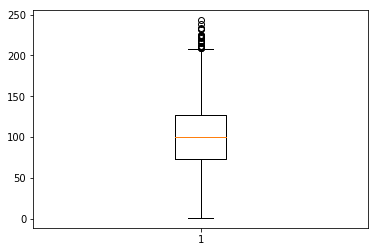

In [71]:
# PLOTTING BOXPLOT TO VISUALIZE OUTLIERS OF THE VARIABLE

%matplotlib inline  
plt.boxplot(mydata['account length'])


In [72]:
# DETECTING OUTLIERS AND REPLACING IT WITH NA(NULL VALUE)


for i in cnames:
    print(i)
    q75, q25 = np.percentile(mydata.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    # #Replace with NA
    mydata.loc[mydata[i] < min,i]=np.nan
    mydata.loc[mydata[i] > max,i]=np.nan

account length
-8.0
208.0
number vmail messages
-25.5
42.5
total day minutes
34.94999999999999
324.95
total day calls
48.0
152.0
total day charge
5.949999999999999
55.230000000000004
total eve minutes
64.78750000000001
335.6875
total eve calls
46.5
154.5
total eve charge
5.5000000000000036
28.539999999999996
total night minutes
65.20000000000003
336.4
total night calls
48.0
152.0
total night charge
2.9349999999999987
15.135000000000002
total intl minutes
3.25
17.25
total intl calls
-1.5
10.5
total intl charge
0.8899999999999992
4.65
number customer service calls
-0.5
3.5


In [73]:
# AFTER REPLACING OUTLIERS WITH NA GETTING THE MISSING VALUES INTO THE DATASETS


missing_val = pd.DataFrame(mydata.isnull().sum())


In [74]:
missing_val

,0
state,0
account length,24
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,60
total day minutes,34
total day calls,35
total day charge,34


** when i was trying the missing value imputation using KNN imputation as taught us in lecture, the error shows that "there is no complete attribute in KNN". Which i asked to mentor , i am suggested to use different imputation methods, even i am shared one link for reference,i refered it but it was little tough for me to implement as well as i have less time to complete the project so here i am using imputation with mean value.

In [75]:
#IMPUTING NULL VALUES WITH MEAN VALUE

mydata.fillna(mydata.mean(),inplace=True)


# FEATURE SELECTION

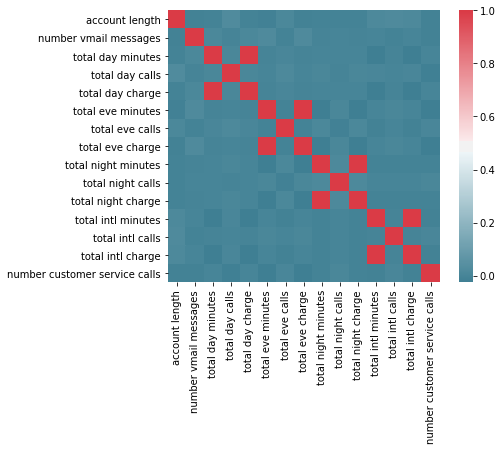

In [76]:
# CORRELATION ANALYSIS USING CORRELATION PLOT

df_corr = mydata.loc[:,cnames]

#SETTING THE WIDTH AND HEIGHT OF THE PLOT

f, ax = plt.subplots(figsize=(7, 5))

# GENERATING THE CORRELATIONMATRIX 

corr = df_corr.corr()

# CORRELATION PLOT USING SEABORN LIBRARY

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [77]:
# CHISQUARE TEST OF INDEPENDENCE TO CHECK THE CORRELATION BETWEEN CATEGORICAL VARIABLES

cat_names = ['state', 'area code', 'phone number',
       'international plan', 'voice mail plan']

#LOOP FOR CHISQUARE TEST
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(mydata['Churn'], mydata[i]))
    print(p)

state
7.850836224371827e-05
area code
0.7546581385329686
phone number
0.493350889587423
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
state                            5000 non-null int64
account length                   5000 non-null float64
international plan               5000 non-null int64
voice mail plan                  5000 non-null int64
number vmail messages            5000 non-null float64
total day calls                  5000 non-null float64
total day charge                 5000 non-null float64
total eve calls                  5000 non-null float64
total eve charge                 5000 non-null float64
total night calls                5000 non-null float64
total night charge               5000 non-null float64
total intl calls                 5000 non-null float64
total intl charge                5000 non-null float64
number customer service calls    5000 non-null float64
Churn                            5000 non-null int64
myindex                          5000 non-null int64
dtypes: float64(11), in

# FEATURE SCALING

In [2]:
# GETTING THE COLUMN NAMES OF ALL THE NUMERIC VARIABLES INTO "cnames"

cnames=['account length', 'number vmail messages', 'total day calls', 'total day charge','total eve calls', 'total eve charge',
        'total night calls', 'total night charge', 'total intl calls', 'total intl charge',
       'number customer service calls',]


In [3]:
# PLOTTING HISTOGRAM PLOT TO OVERVIW THE DATA DISTRIBUTION INTO THE NIUMERIC VARIABLE

%matplotlib inline     
plt.hist(mydata['account length'], bins='auto')

NameError: name 'plt' is not defined

# FEATURE SCALING

In [1]:
 # SCALING THE VARIABLES USING STANDARDIZATION METHOD
    
for i in cnames:
        print(i)
        mydata[i] = ((mydata[i] - mydata[i].mean())/mydata[i].std())

NameError: name 'cnames' is not defined

# SAMPLING  DATASET 

In [82]:
# SAMPLING DATASET INTO TRAIN AND TEST DATASETS

train = mydata[mydata.myindex==1]
test= mydata[mydata.myindex==2]
train =train.drop('myindex',axis=1)
test=test.drop('myindex',axis=1)
test = test.reset_index(drop=True)

# MODEL BUILDING

# DECISION TREE FOR CLASSIFICATION

In [83]:
#IMPORTING LIBRARIES FOR DECISION TREE

from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [84]:
# REPLACE TARGET VARIABLES CATEGORIES INTO "YES" AND "NO"

train['Churn'] = train['Churn'].replace(0, 'No')
train['Churn'] = train['Churn'].replace(1, 'Yes')
test['Churn'] = test['Churn'].replace(0, 'No')
test['Churn'] = test['Churn'].replace(1, 'Yes')

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 15 columns):
state                            3333 non-null int64
account length                   3333 non-null float64
international plan               3333 non-null int64
voice mail plan                  3333 non-null int64
number vmail messages            3333 non-null float64
total day calls                  3333 non-null float64
total day charge                 3333 non-null float64
total eve calls                  3333 non-null float64
total eve charge                 3333 non-null float64
total night calls                3333 non-null float64
total night charge               3333 non-null float64
total intl calls                 3333 non-null float64
total intl charge                3333 non-null float64
number customer service calls    3333 non-null float64
Churn                            3333 non-null object
dtypes: float64(11), int64(3), object(1)
memory usage: 416.6+ KB


In [86]:
# SPLITING DATASET FOR MODEL BUILDING

X_train=train.values[:,0:14]
Y_train=train.values[:,14]
X_test=test.values[:,0:14]
Y_test=test.values[:,14]

In [87]:
#DECISION TREE

C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)

# PREDICT NEW TEST CASES

C50_Predictions = C50_model.predict(X_test)


In [88]:
# BUILDING CONFUSION MATRIX

from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(Y_test, C50_Predictions)
CM = pd.crosstab(Y_test, C50_Predictions)

In [89]:
# CREATE DOT FILE TO VISUALIZE TREE  #http://webgraphviz.com/

graph=mydata.drop(['Churn','myindex'],axis=1)
import graphviz
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = graph.columns)

In [90]:
# LETS SAVE TP, TN, FP, FN 

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [91]:
# ACCURACY OF MODEL
accuracy_score(Y_test, C50_Predictions)*100

92.20155968806239

In [92]:
((TP+TN)*100)/(TP+TN+FP+FN)

92.20155968806239

In [93]:
# FALSE NEGATIVE RATE

(FN*100)/(FN+TP)

32.142857142857146

# RANDOM FOREST

In [94]:
# IMPORTING LIBRARIES

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, Y_train)

In [95]:
# PREDICT THE NEW TEST CASES

RF_Predictions = RF_model.predict(X_test)

In [96]:
# BUILDING CONFUSION MATRIX 

CM = pd.crosstab(Y_test, RF_Predictions)

# LETS SAVE TP, TN, FP, FN

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]



In [97]:
# ACCURACY OF THE MODEL

accuracy_score(Y_test, RF_Predictions)*100


93.70125974805039

In [98]:
((TP+TN)*100)/(TP+TN+FP+FN)

93.70125974805039

In [99]:
# FALSE NEGATIVE RATE

(FN*100)/(FN+TP)


44.642857142857146

# KNN IMPLEMENTATION

In [100]:
#IMPORTING LIBRARIES

from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, Y_train)

In [101]:
# PREDICT THE TEST CASES

KNN_Predictions = KNN_model.predict(X_test)

In [102]:
# BUILDING CONFUSION MATRIX

CM = pd.crosstab(Y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [103]:
# ACCURACY OF THE MODEL

accuracy_score(Y_test, KNN_Predictions)*100

86.74265146970606

In [104]:
# FALSE NEGATIVE RATE

(FN*100)/(FN+TP)

96.42857142857143

# NAIVE BAYES

In [105]:
#IMPORTING LIBRARIES

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(X_train, Y_train)

In [106]:
# PREDICT THE TEST CASES

NB_Predictions = NB_model.predict(X_test)

In [107]:
#BUILDING A CONFUSION MATRIX

CM = pd.crosstab(Y_test, NB_Predictions)

#LETS SAVE TN,FN,TP,FP

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [108]:
# ACCURACY OF THE MODEL

accuracy_score(Y_test,NB_Predictions)*100

85.84283143371326

In [109]:
# FALSE NEGATIVE RATE

(FN*100)/(FN+TP)

68.30357142857143

# LOGISTIC REGRESSION

In [110]:
# GETTING THE COLUMN NAMES OF CATEGORICAL VARIABLES

cat1_names=['state', 'international plan', 'voice mail plan']

In [111]:
#DEVLOPING A MODEL

logit = pd.DataFrame(mydata['Churn'])
logit=logit.join(mydata[cnames])

In [112]:
# CREATING DUMMIES FOR VARIABLES

for i in cat1_names:
    temp = pd.get_dummies(mydata[i], prefix = i)
    logit = logit.join(temp)

In [113]:
# SPLITTING THE DATA INTO TRAIN AND TEST

Sample_Index = np.random.rand(len(logit)) < 0.8

train = logit[Sample_Index]
test = logit[~Sample_Index]

In [114]:
# SELECTING COLUMN INDEXES FOR ALL THE VARIABLES

train_cols = train.columns[1:67]

In [115]:
logit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 67 columns):
Churn                            5000 non-null int64
account length                   5000 non-null float64
number vmail messages            5000 non-null float64
total day calls                  5000 non-null float64
total day charge                 5000 non-null float64
total eve calls                  5000 non-null float64
total eve charge                 5000 non-null float64
total night calls                5000 non-null float64
total night charge               5000 non-null float64
total intl calls                 5000 non-null float64
total intl charge                5000 non-null float64
number customer service calls    5000 non-null float64
state_0                          5000 non-null uint8
state_1                          5000 non-null uint8
state_2                          5000 non-null uint8
state_3                          5000 non-null uint8
state_4                

In [116]:
# BUILDING LOGISTIC REGRESSION MODEL


import statsmodels.api as sm

logit_model = sm.Logit(train['Churn'].astype(float), train[train_cols].astype(float)).fit()

logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.334915
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3987
Model:                          Logit   Df Residuals:                     3923
Method:                           MLE   Df Model:                           63
Date:                Mon, 18 Feb 2019   Pseudo R-squ.:                  0.1709
Time:                        03:37:42   Log-Likelihood:                -1335.3
converged:                       True   LL-Null:                       -1610.6
                                        LLR p-value:                 5.343e-79
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0619      0.050      1.237      0.216      -0.036       0.160
number vmail messages             0.1525      0.213      0.716      0.474      -0.265       0.570
total day calls                   0.0509      0.050      1.021      0.307      -0.047       0.149
total day charge                  0.5960      0.053     11.212      0.000       0.492       0.700
total eve calls                  -0.0528      0.051     -1.038      0.299      -0.152       0.047
total eve charge                  0.2453      0.051      4.801      0.000       0.145       0.345
total night calls                -0.0030      0.050     -0.059      0.953      -0.101       0.095
total night charge                0.2277      0.050      4.521      0.000       0.129       0.326
total intl calls                 -0.2605      0.053     -4.936      0.000      -0.364      -0.157
total intl charge                 0.1647      0.051      3.231      0.001       0.065       0.265
number customer service calls    -0.0023      0.050     -0.046      0.963      -0.100       0.095
state_0                          -0.6888   6.95e+06  -9.91e-08      1.000   -1.36e+07    1.36e+07
state_1                          -0.3208   6.95e+06  -4.62e-08      1.000   -1.36e+07    1.36e+07
state_2                           0.3445   6.95e+06   4.96e-08      1.000   -1.36e+07    1.36e+07
state_3                          -0.4538   6.95e+06  -6.53e-08      1.000   -1.36e+07    1.36e+07
state_4                           0.9063   6.95e+06    1.3e-07      1.000   -1.36e+07    1.36e+07
state_5                          -0.2710   6.95e+06   -3.9e-08      1.000   -1.36e+07    1.36e+07
state_6                           0.2718   6.95e+06   3.91e-08      1.000   -1.36e+07    1.36e+07
state_7                          -0.3936   6.95e+06  -5.67e-08      1.000   -1.36e+07    1.36e+07
state_8                          -0.0080   6.95e+06  -1.16e-09      1.000   -1.36e+07    1.36e+07
state_9                          -0.1050   6.95e+06  -1.51e-08      1.000   -1.36e+07    1.36e+07
state_10                          0.1881   6.95e+06   2.71e-08      1.000   -1.36e+07    1.36e+07
state_11                         -1.0441   6.95e+06   -1.5e-07      1.000   -1.36e+07    1.36e+07
state_12                          0.0870   6.95e+06   1.25e-08      1.000   -1.36e+07    1.36e+07
state_13                         -0.2051   6.95e+06  -2.95e-08      1.000   -1.36e+07    1.36e+07
state_14                         -1.0131   6.95e+06  -1.46e-07      1.000   -1.36e+07    1.36e+07
state_15                          0.0574   6.95e+06   8.26e-09      1.000   -1.36e+07    1.36e+07
state_16                          0.2063   6.95e+06   2.97e-08      1.000   -1.36e+07    1.36e+07
state_17                          0.2837   6.95e+06   4.08e-08      1.000   -1.36e+07    1.36e+07
state_18                          0.0307   6.95e+06   4.41e-09      1.000   -1.36e+07    1.36e+07
state_1

In [117]:
# PREDICT THE TEST CASES

test['Actual_prob'] = logit_model.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [118]:
# BUILD CONFUSION MATRIX

CM = pd.crosstab(test['Churn'], test['ActualVal'])


In [119]:
#LETS SAVE TP, TN, FP, FN

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [121]:
# ACCYRACY OF THE MODEL

((TP+TN)*100)/(TP+TN+FP+FN)

86.77196446199407

In [122]:
# FALSE NEGATIVE RATE

(FN*100)/(FN+TP)


82.11920529801324